[ pytorch fashion mnist 모델 ]

- 데이터셋 : fashion-mnist_train.csv
- 학습방법 : 지도학습 + 분류 (이진분류)

< 모듈 및 파일 로딩 > <hr>

In [2]:
# [1-1] 모듈 로딩
import pandas as pd
import numpy as np

import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim      # 최적화 모듈 

from sklearn.model_selection import train_test_split

In [3]:
# [1-2] 파일로딩
data_file = 'fashion-mnist_train.csv'

fashion_df = pd.read_csv(data_file, skipfooter=1, engine='python')

In [4]:
display(fashion_df.head(2))

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         0         0  
1         0         0         0         0  

[2 rows x 785 columns]

In [5]:
# [1-3] 데이터 확인 : 범주형 데이터가 이미 수치화 되어 있음
print(fashion_df['label'].unique())

print(fashion_df['label'].dtype)

[2 9 6 0 3 4 5 8 7 1]
int64


In [6]:
# [1-4] 이진 분류 - 0을 제외한 나머지 숫자 1로 통일 
fashion_df['label'] = fashion_df['label'].apply(lambda x: 1 if 1 <= x <= 9 else x)

print(fashion_df['label'].unique())

print(fashion_df['label'].dtype)

[1 0]
int64


< 데이터셋 준비 > <hr>

In [7]:
# [2-1] 피쳐 타겟 분리
featureDF = fashion_df[fashion_df.columns[1:]]  
TargetSR = fashion_df[fashion_df.columns[0]]

print(TargetSR)

0        1
1        1
2        1
3        0
4        1
        ..
59994    1
59995    1
59996    1
59997    1
59998    1
Name: label, Length: 59999, dtype: int64


In [8]:
# [2-2] train test 데이터셋 분리
x_train, x_test, y_train, y_test = train_test_split(featureDF, 
                                                    TargetSR,
                                                    test_size=0.2,
                                                    stratify=TargetSR,
                                                    random_state=42)

< 모델 설계 및 클래스 구현 > <hr>

In [9]:
# [3-1] 모델 클래스 설계 
## - 클래스 이 름 : Binary_Model
## - 부 모 클래스 : nn.Module
## - 데 이  터 셋 : 피쳐 많음 , 타겟 1 , 타겟 범주형
## - 학습    방법 : 지도학습 - 분류(이진)
## - 구현알고리즘 : 인공신경망계열 DNN 
## -------------------------------------------------
##             입력       출력/퍼셉트론수    활성화함수
## - 입력층      3(피쳐)   20               ReLU
## - 은닉층      20       10                ReLU
## - 은닉층      10        5                ReLU
## - 출력층       5        1(타겟)          Sigmoid
## 피쳐와 타겟을 제외하고 나머지는 사용자 지정 : 단, 초반에 퍼셉트론 수가 많은 것은 GOOD

In [10]:
# 클래스 생성
class Binary_Model(nn.Module):
    
    def __init__(self, in_in, in_out, h1_out, h2_out, out_out):
        super().__init__()
        pass
        
        self.input_layer = nn.Linear(in_in, in_out)
        self.hidden_layer1 = nn.Linear(in_out, h1_out)
        self.hidden_layer2 = nn.Linear(h1_out, h2_out)
        self.output_layer = nn.Linear(h2_out, out_out)
        
    
    # 순방향 학습 진행 메서드 : forward로 무조건 고정!!
    # forward : 필수 오버라이딩 메서드 
    # 매개변수 data : 학습용 데이터 전달
    
    # 입력층 학습 
    def forward(self,data):     
        output = self.input_layer(data)
        output = F.relu(output)
        
        output = self.hidden_layer1(output)
        output = F.relu(output)
        
        output = self.hidden_layer2(output)
        output = F.relu(output)
        
        output = self.output_layer(output)
        output = F.sigmoid(output)
    
        return output
        

In [11]:
# [3-2] 모델 구조 확인
model = Binary_Model(784,20,10,5,1)

print(model)

Binary_Model(
  (input_layer): Linear(in_features=784, out_features=20, bias=True)
  (hidden_layer1): Linear(in_features=20, out_features=10, bias=True)
  (hidden_layer2): Linear(in_features=10, out_features=5, bias=True)
  (output_layer): Linear(in_features=5, out_features=1, bias=True)
)


< 학습 준비 > <hr>

In [12]:
# [4-1] 학습 관련 설정들
EPOCHS = 50               # 학습용 DS를 처음부터 끝까지 50번 학습
BATCH_SIZE = 128          # DS를 학습량 만큼 나눈 사이즈
ITERATION = int(x_train.shape[0]/BATCH_SIZE)             # 학습용 DS가 분리된 수 => 1 에포크에 W,b 업데이트 횟수 
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'  # 학습, 데이터셋 로딩 등 GPU에서 실행 여부 설정  

print(f'EPOCHS : {EPOCHS}')
print(f'BATCH_SIZE : {BATCH_SIZE}')
print(f'ITERATION : {ITERATION}')
print(f'DEVICE : {DEVICE}')

EPOCHS : 50
BATCH_SIZE : 128
ITERATION : 374
DEVICE : cpu


In [13]:
# [4-2] 학습 관련 인스턴스들 
MODEL = Binary_Model(784,20,10,5,1)          # 학습 모델
OPTIMIZER = optim.Adam(MODEL.parameters())   # 최적화, 즉 경사하강법 알고리즘으로 W,b의 값 갱신 
LOSS_FN = nn.BCELoss()                       # 이진 분류 손실계산 인스턴스

In [14]:
# [4-3] 검증 함수
# - 검증용 데이터셋으로 모델 검증
# - 학습 지속여부 결정 기준이 됨

def evaluate():
    # 에포크 단위로 검증 -> 검증 모드
    MODEL.eval()
    
    # W,b 업데이트 해제
    with torch.no_grad():
        # 검증용 데이터셋 -> 텐서화
        # ndarray -> tensor 변환
        x = torch.FloatTensor(x_test.values)
        y = torch.FloatTensor(y_test.values)
        
        # 검증 진행
        pre_y = MODEL(x)
        
        # 손실 계산
        loss = LOSS_FN(pre_y, y.reshape(-1,1))     # [[0.4646]], y는 2차원
        
    return loss.item()

In [15]:
# [4-4] 학습 함수
def training():
    
    # 학습 모드 설정
    model.train()
        
    E_LOSS = 0
    for i in range(ITERATION):
        start = i * BATCH_SIZE
        end = start + BATCH_SIZE
        
        # ndarray(values) => tensor 변환
        x = torch.FloatTensor(x_train.values[start:end])
        y = torch.FloatTensor(y_train.values[start:end])
        
        # 가중치 / 기울기 0 초기화
        OPTIMIZER.zero_grad()
        
        # 학습 진행
        pre_y = MODEL(x)
        
        # 손실 계산
        loss = LOSS_FN(pre_y, y.reshape(-1,1))
        
        # 역전파 진행
        loss.backward()
        
        # 가중치 / 절편 업데이트
        OPTIMIZER.step()
        
        E_LOSS += loss.item()
    
    return loss

In [16]:
# [4-5] 학습 / 검증 동시 진행 

# 에포크 : DS 처음부터 ~ 끝까지 학습
LOSS_HIST = {'Train' : [], 'Valid' : []}

# 에포크 단위 학습/검증 진행
for epoch in range(EPOCHS):
    trainLoss = training()
    validLoss = evaluate()
    
    LOSS_HIST['Train'].append(trainLoss)
    LOSS_HIST['Valid'].append(validLoss)
    
    print(f'\nEPOCH[{epoch+1}/{EPOCHS}]------------------------')
    print(f'TRAIN LOSS {trainLoss:.5f}')
    print(f'VALID LOSS {validLoss:.5f}')


EPOCH[1/50]------------------------
TRAIN LOSS 0.11575
VALID LOSS 0.10419

EPOCH[2/50]------------------------
TRAIN LOSS 0.09895
VALID LOSS 0.09684

EPOCH[3/50]------------------------
TRAIN LOSS 0.09353
VALID LOSS 0.09418

EPOCH[4/50]------------------------
TRAIN LOSS 0.09020
VALID LOSS 0.09245

EPOCH[5/50]------------------------
TRAIN LOSS 0.07640
VALID LOSS 0.08866

EPOCH[6/50]------------------------
TRAIN LOSS 0.08414
VALID LOSS 0.08930

EPOCH[7/50]------------------------
TRAIN LOSS 0.08576
VALID LOSS 0.08953

EPOCH[8/50]------------------------
TRAIN LOSS 0.07633
VALID LOSS 0.09024

EPOCH[9/50]------------------------
TRAIN LOSS 0.06755
VALID LOSS 0.08656

EPOCH[10/50]------------------------
TRAIN LOSS 0.07157
VALID LOSS 0.08709

EPOCH[11/50]------------------------
TRAIN LOSS 0.06231
VALID LOSS 0.08888

EPOCH[12/50]------------------------
TRAIN LOSS 0.06296
VALID LOSS 0.08531

EPOCH[13/50]------------------------
TRAIN LOSS 0.06364
VALID LOSS 0.08737

EPOCH[14/50]--------

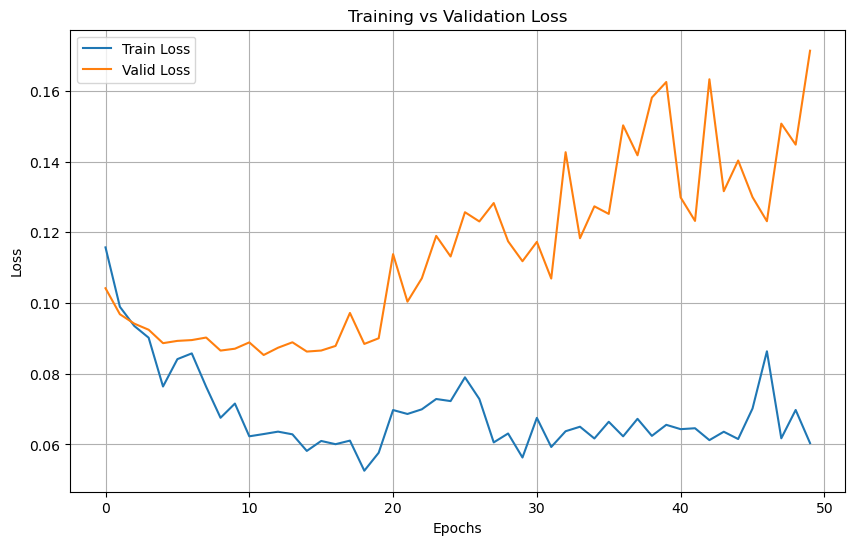

In [17]:
# [4-6] 시각화 
import matplotlib.pyplot as plt

train_loss = torch.tensor(LOSS_HIST['Train']).detach().numpy()
valid_loss = torch.tensor(LOSS_HIST['Valid']).detach().numpy()


# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Valid Loss')

# 그래프 꾸미기
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# 그래프 출력
plt.show()

# 결과 : EPOCH 14일때 가장 낮은 Valid Loss 
#        Valid Loss와 Train Loss 모두 비율도 괜찮음 
